In [31]:
import pandas as pd
import statistics
import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, ARIMA


In [32]:
data = pd.read_csv("HU_File_Q1_S2.csv")

def Processing_Calltime(data):
    Date = data["Calltime"].str.split(" ", n=1, expand=True)
    data["Time_of_Call"] = Date[1]
    data = data.drop(columns=["DialStart"])
    data['Hour'] = data.Time_of_Call.str[:2]
    data['Hour'] = pd.to_numeric(data['Hour'])
    
    data['Minutes'] = data.Time_of_Call.str[3:5]
    data['Minutes'] = pd.to_numeric(data['Minutes'])
    data['Seconds'] = data.Time_of_Call.str[6:]
    data['Seconds'] = pd.to_numeric(data['Seconds'])
    
    return data

def Processing_Date(data):
    Date = data["Calldate"].str.split('-', n=2, expand=True)   
    data['Year'] = Date[0]
    data['Month'] = Date[1]
    data['Day_Date'] = Date[2]
    data['Year'] = pd.to_numeric(data['Year'])
    data['Month'] = pd.to_numeric(data['Month'])
    data['Day_Date'] = pd.to_numeric(data['Day_Date'])
    return data


def Interval_Diff_Calc(data):
    Interval_Difference = [49.200555]
    ArrivalTime_Tracker = [49.200555]
    count = 0
    for i in data['ArrivalTime']:
        if count > 0:

            if i > ArrivalTime_Tracker[-1]:
                Interval_Difference.append(i - ArrivalTime_Tracker[-1])
            else:
                Interval_Difference.append(i)

            ArrivalTime_Tracker.append(i)

        count = count + 1


    data['Interval_Difference'] = Interval_Difference
    data.to_csv('Check.csv')
    return data
     
data = Processing_Calltime(data)

data = Processing_Date(data)

data = Interval_Diff_Calc(data)

data['DateTime'] = data['Calldate'] + ' ' + data.Time_of_Call.str[:5]

data


,Unnamed: 0,Calldate,ArrivalTime,Calltime,DayOfWeek,Time_of_Call,Hour,Minutes,Seconds,Year,Month,Day_Date,Interval_Difference,DateTime
0,1,2019-06-01,145.402209,2019-06-01 07:02:25,Saturday,07:02:25,7,2,25,2019,6,1,49.200555,2019-06-01 07:02
1,2,2019-06-01,162.846292,2019-06-01 07:02:42,Saturday,07:02:42,7,2,42,2019,6,1,113.645737,2019-06-01 07:02
2,3,2019-06-01,218.327066,2019-06-01 07:03:38,Saturday,07:03:38,7,3,38,2019,6,1,55.480774,2019-06-01 07:03
3,4,2019-06-01,252.200917,2019-06-01 07:04:12,Saturday,07:04:12,7,4,12,2019,6,1,33.873851,2019-06-01 07:04
4,5,2019-06-01,324.761371,2019-06-01 07:05:24,Saturday,07:05:24,7,5,24,2019,6,1,72.560455,2019-06-01 07:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278487,278488,2019-09-30,57554.531892,2019-09-30 22:59:14,Monday,22:59:14,22,59,14,2019,9,30,26.212493,2019-09-30 22:59
278488,278489,2019-09-30,57564.664445,2019-09-30 22:59:24,Monday,22:59:24,22,59,24,2019,9,30,10.132552,2019-09-30 22:59
278489,278490,2019-09-30,57573.171744,2019-09-30 22:59:33,Monday,22:59:33,22,59,33,2019,9,30,8.507300,2019-09-30 22:59
278490,278491,2019-09-30,57588.592355,2019-09-30 22:59:48,Monday,22:59:48,22,59,48,2019,9,30,15.420610,2019-09-30 22:59


Select the day to work with:  Monday


        Unnamed: 0    Calldate   ArrivalTime             Calltime DayOfWeek  \
0                1  2019-06-01    145.402209  2019-06-01 07:02:25  Saturday   
1                2  2019-06-01    162.846292  2019-06-01 07:02:42  Saturday   
2                3  2019-06-01    218.327066  2019-06-01 07:03:38  Saturday   
3                4  2019-06-01    252.200917  2019-06-01 07:04:12  Saturday   
4                5  2019-06-01    324.761371  2019-06-01 07:05:24  Saturday   
...            ...         ...           ...                  ...       ...   
278487      278488  2019-09-30  57554.531892  2019-09-30 22:59:14    Monday   
278488      278489  2019-09-30  57564.664445  2019-09-30 22:59:24    Monday   
278489      278490  2019-09-30  57573.171744  2019-09-30 22:59:33    Monday   
278490      278491  2019-09-30  57588.592355  2019-09-30 22:59:48    Monday   
278491      278492  2019-09-30  57595.620083  2019-09-30 22:59:55    Monday   

       Time_of_Call  Hour  Minutes  Seconds  Year  

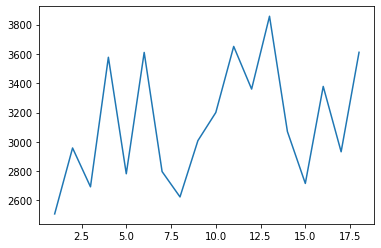

[2508, 2624, 2693, 2716, 2782, 2797, 2932, 2958, 3008, 3070, 3200, 3360, 3378, 3577, 3610, 3611, 3651, 3857]


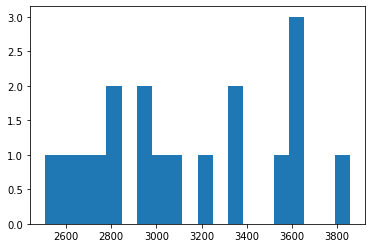

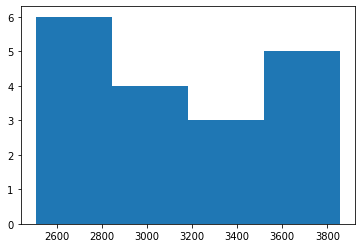

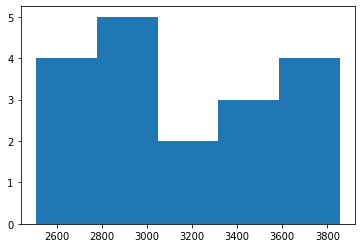

2508


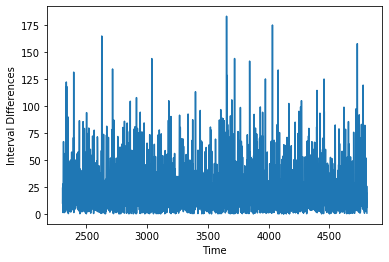

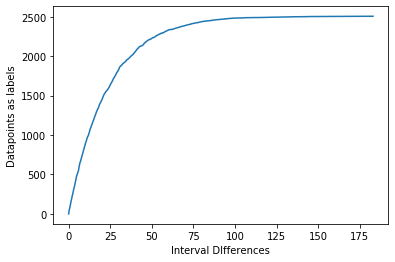

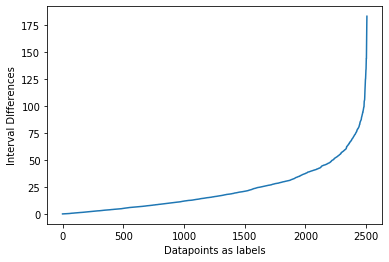

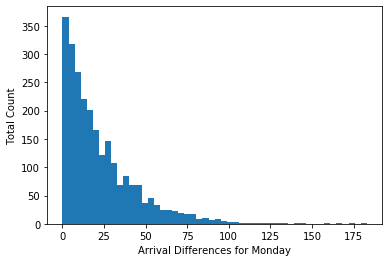

2958


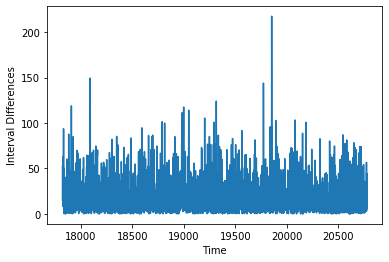

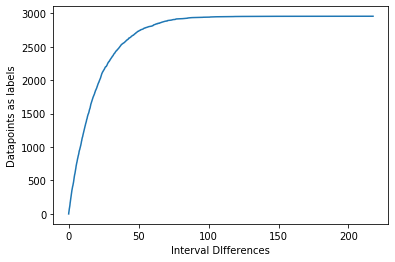

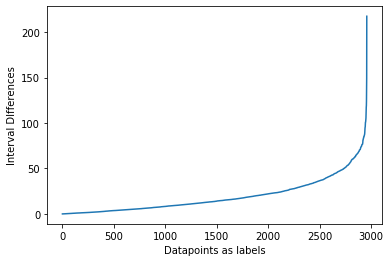

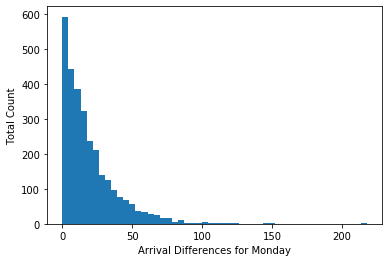

2693


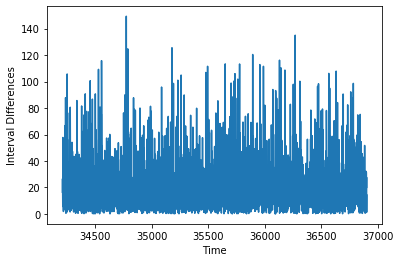

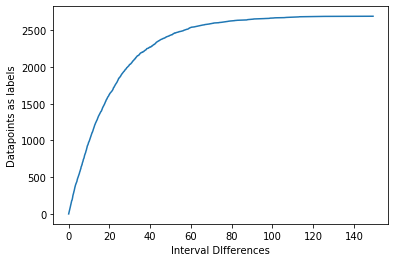

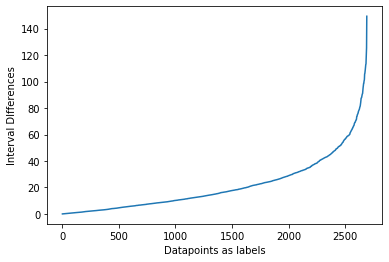

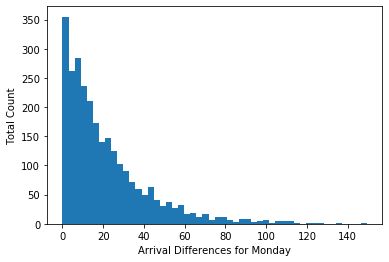

3577


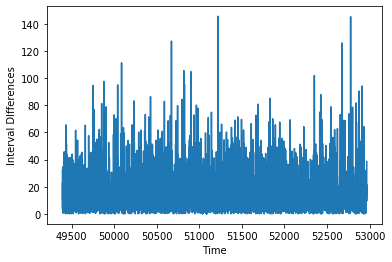

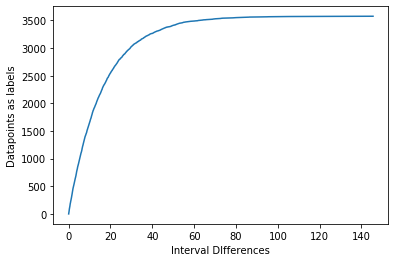

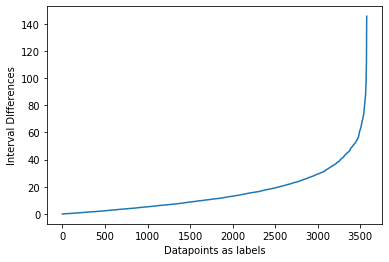

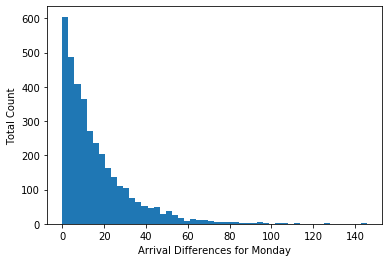

2782


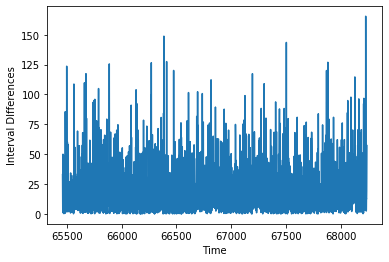

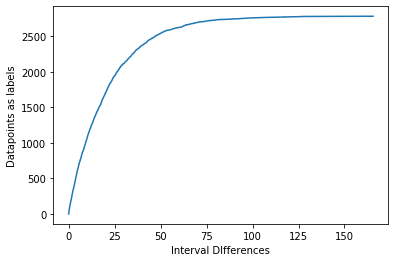

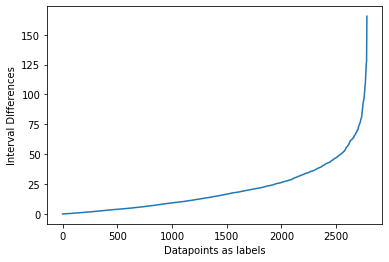

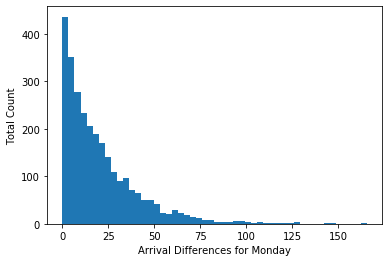

3610


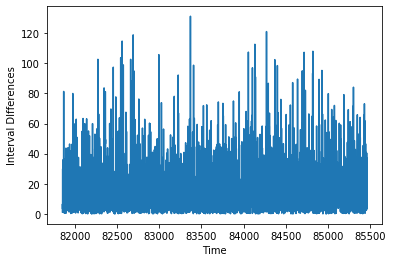

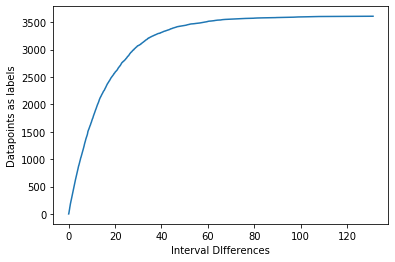

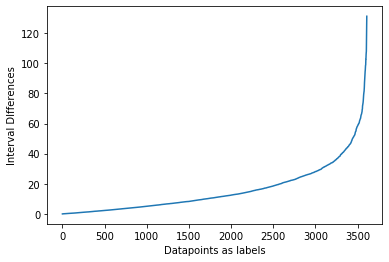

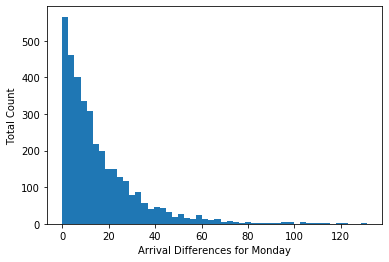

2797


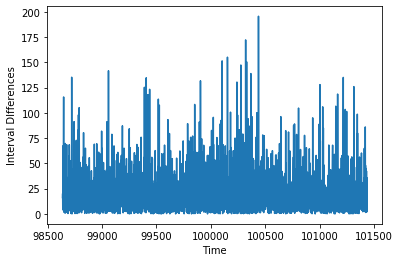

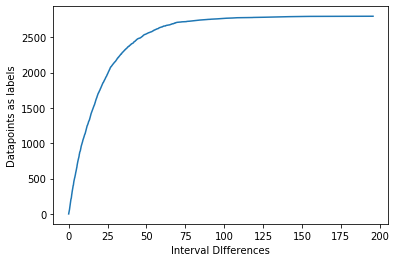

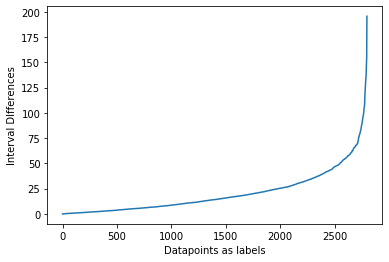

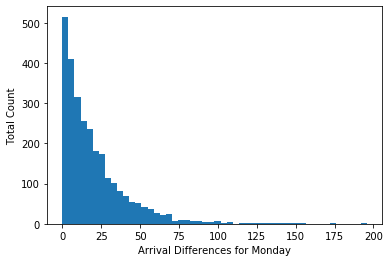

2624


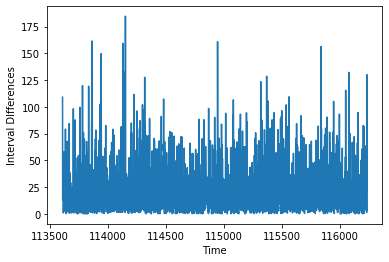

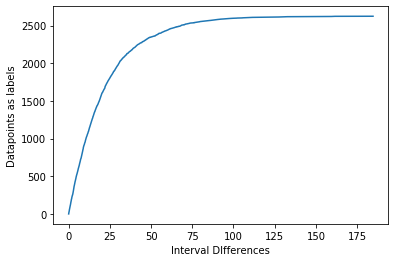

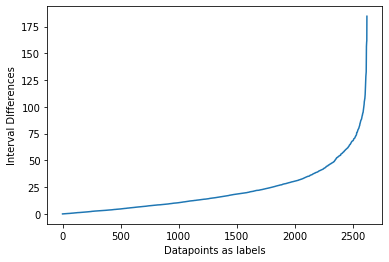

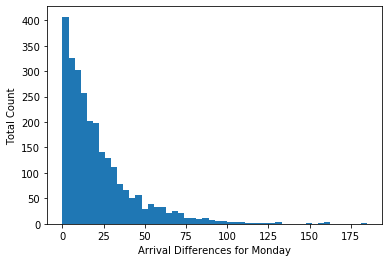

3008


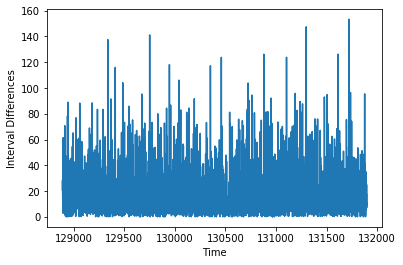

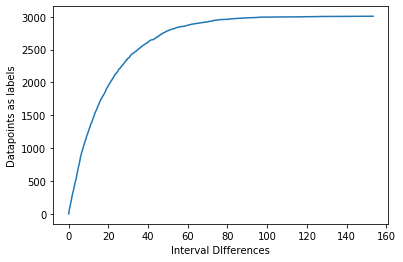

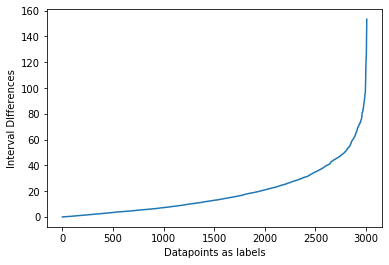

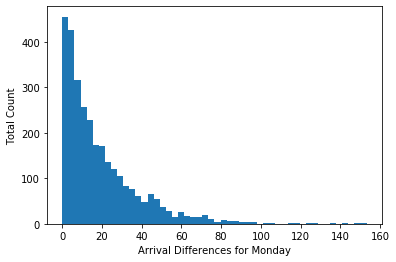

3200


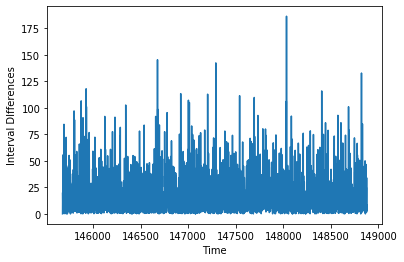

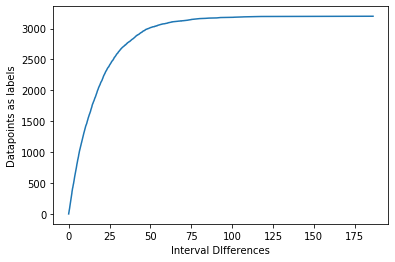

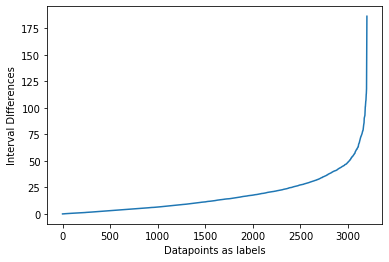

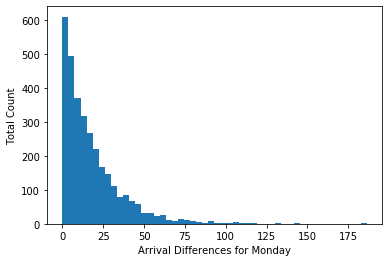

3651


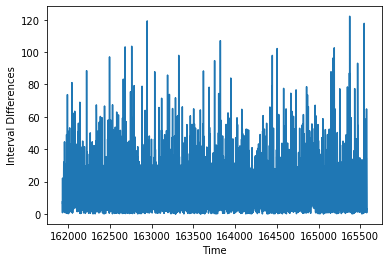

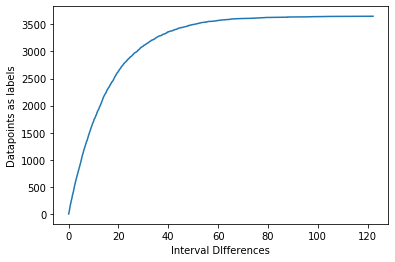

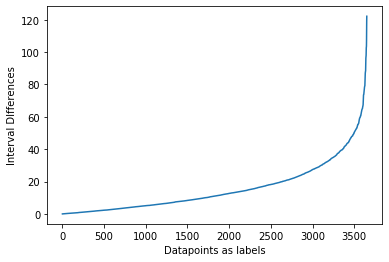

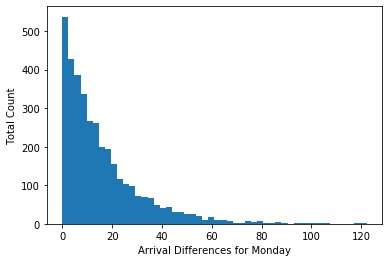

3360


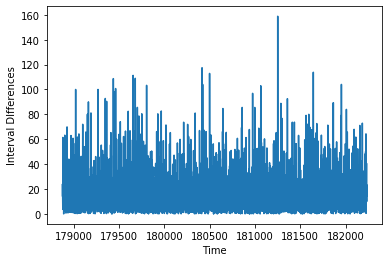

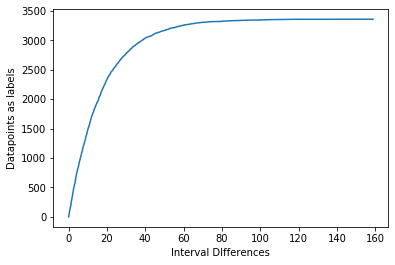

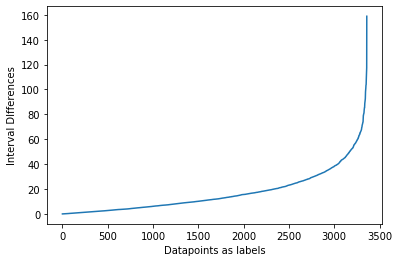

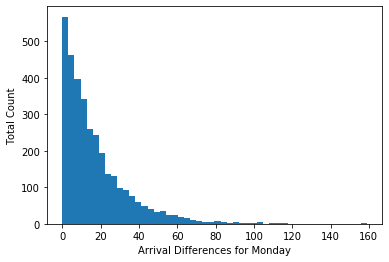

3857


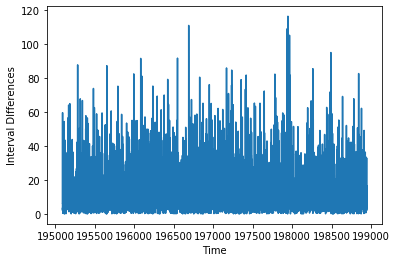

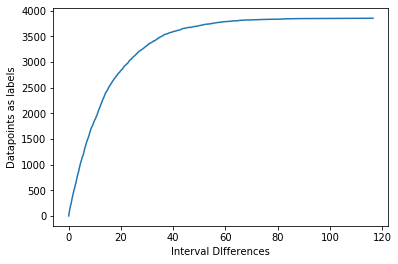

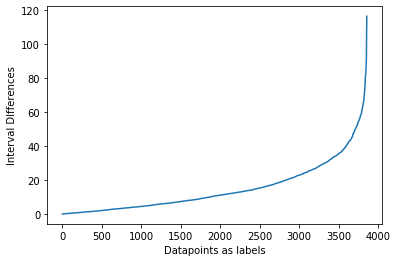

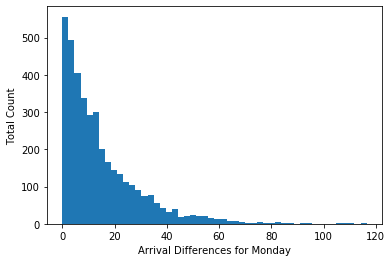

3070


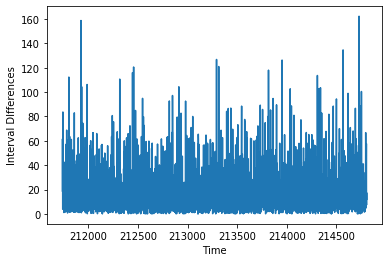

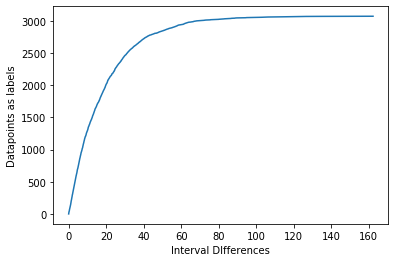

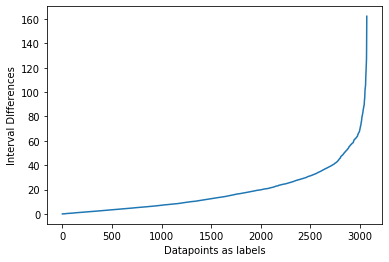

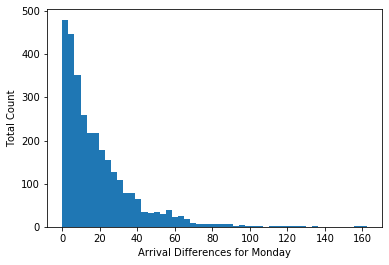

2716


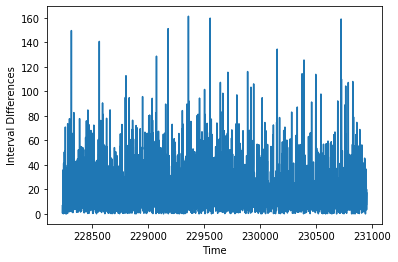

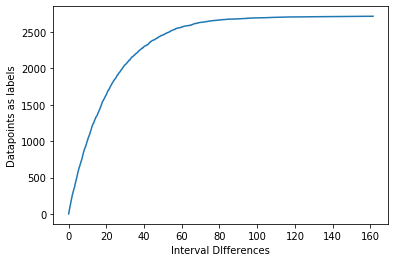

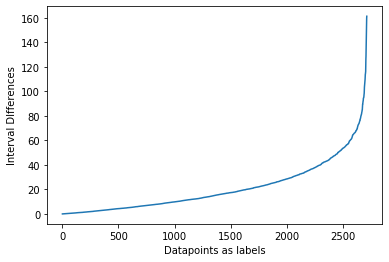

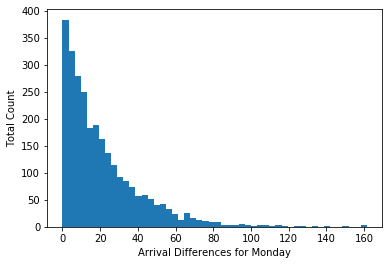

3378


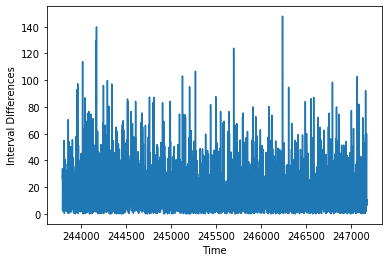

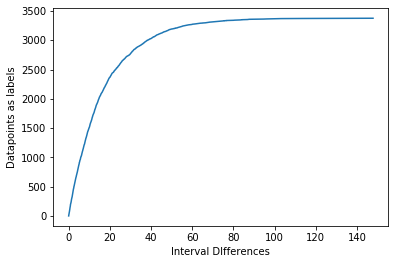

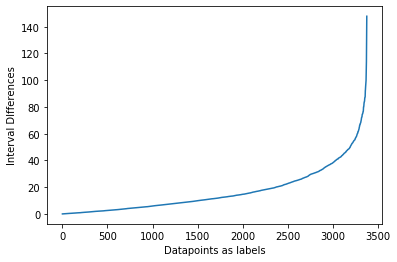

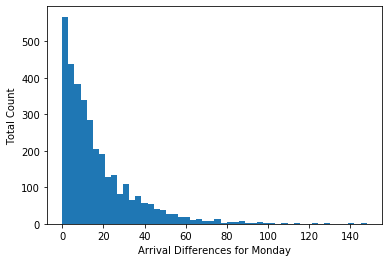

2932


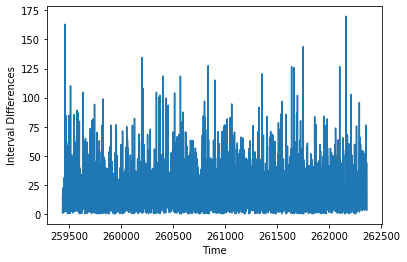

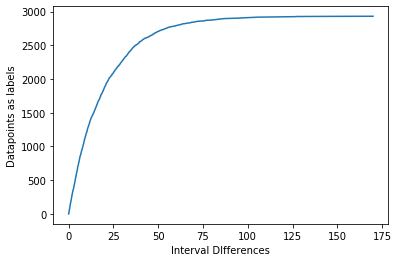

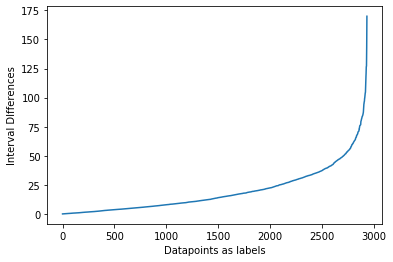

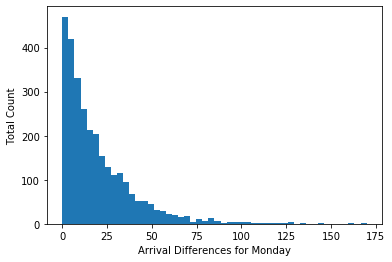

3611


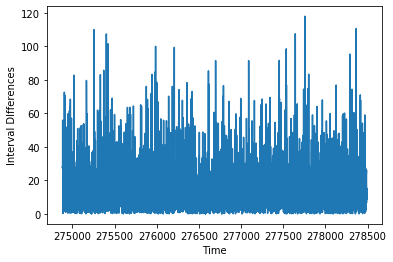

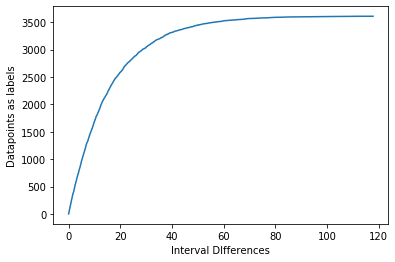

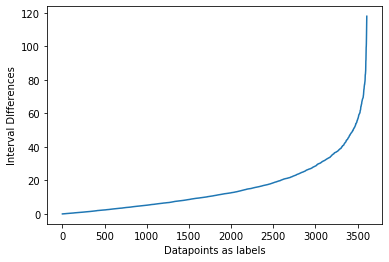

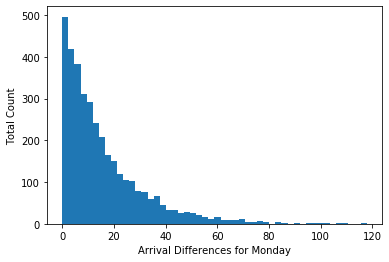

In [68]:
Day = input("Select the day to work with: ")
Mondays = data[data['DayOfWeek'] == str(Day)]
print(data)
Dates = Mondays.Calldate.unique()
X = []    
Day = []
count = 1
for i in Dates:
    X.append(len(Mondays[Mondays['Calldate'] == i]))
    Day.append(count)
    count = count + 1

print(X, max(X))
plt.plot(Day, X)
plt.show()

Y = sorted(X)
print(Y)

plt.hist(X, bins=20)
plt.show()

plt.hist(X, bins=4)
plt.show()


plt.hist(X, bins=5)
plt.show()

for i in Dates:
    mon = data[data['Calldate'] == i]
    Sorted = mon.sort_values('Interval_Difference')
    print(len(Sorted))
    Sorted = Sorted.reset_index()
    plt.plot(mon.index,mon['Interval_Difference'])
    plt.xlabel("Time")
    plt.ylabel("Interval DIfferences")
    plt.show()
    plt.plot(Sorted['Interval_Difference'],Sorted.index)
    plt.ylabel("Datapoints as labels")
    plt.xlabel("Interval DIfferences")
    plt.show()
    plt.plot(Sorted.index,Sorted['Interval_Difference'])
    plt.xlabel("Datapoints as labels")
    plt.ylabel("Interval DIfferences")
    plt.show()
    plt.hist(Sorted['Interval_Difference'], bins=50)
    plt.xlabel("Arrival Differences for Monday")
    plt.ylabel("Total Count")
    plt.show()




In [62]:
Day = input("Select the day to work with: ")
Mondays = data[data['DayOfWeek'] == str(Day)]
Dates = Mondays.Calldate.unique()
maxRecords = 0
for i in Dates:
    mon = data[data['Calldate'] == i]
    if len(mon) > maxRecords:
        maxRecords = len(mon)
indexxx= pd.date_range(start='4/1/2020', periods=len(Dates)*maxRecords, freq='1min')
print(indexxx[4000])
Intervals = []

for i in Dates:
    mon = data[data['Calldate'] == i]
    Sorted = mon.sort_values('Interval_Difference', ascending=False)
    mondayLength = len(Sorted)    
    try:
        print(Intervals[-1])
    except:
        donothing = 9
    Intervals.extend(Sorted['Interval_Difference'].tolist())
    if (len(Sorted) < maxRecords):
        for j in range(0,maxRecords-len(Sorted)):
            Intervals.append(1)
            
print(maxRecords)
print(len(indexxx), len(Intervals))
print(len(Intervals)/maxRecords, len(Dates))


Select the day to work with:  Saturday


2020-04-03 18:40:00
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1494
26892 26892
18.0 18


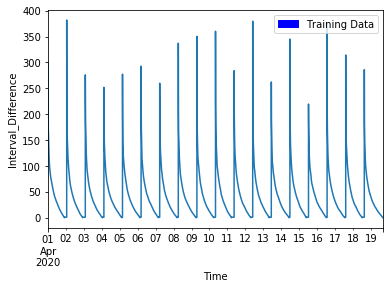

Figure 7.1:Time vs Interval_Difference


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


1494
2020-04-19 23:12:00    21.464185
2020-04-19 23:13:00    21.370120
2020-04-19 23:14:00    21.285264
2020-04-19 23:15:00    21.201034
2020-04-19 23:16:00    21.113670
                         ...    
2020-04-20 04:07:00    10.192513
2020-04-20 04:08:00    10.166077
2020-04-20 04:09:00    10.141884
2020-04-20 04:10:00    10.119649
2020-04-20 04:11:00    10.095338
Freq: T, Length: 300, dtype: float64


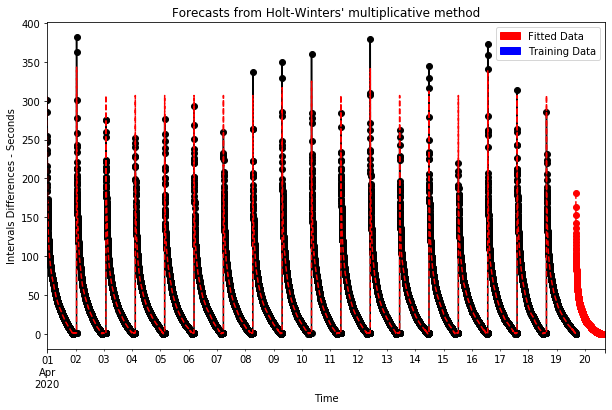

In [63]:
import matplotlib.patches as mpatches

aust = pd.Series(Intervals, indexxx)
ax=aust.plot()
ax.set_xlabel("Time")
ax.set_ylabel("Interval_Difference")
orange = mpatches.Patch(color='blue', label='Training Data')
plt.legend(handles=[orange])
plt.show()
print("Figure 7.1:Time vs Interval_Difference")

fit1 = ExponentialSmoothing(aust, seasonal_periods=maxRecords, trend=None, seasonal='add').fit(smoothing_level=0.9,use_boxcox=True, optimized=True)
fit2 = ExponentialSmoothing(aust, seasonal_periods=maxRecords, trend=None, seasonal='mul').fit(use_boxcox=True, optimized=True, smoothing_level=1)

results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]



ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("Intervals Differences - Seconds")
ax.set_xlabel("Time")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit1.forecast(maxRecords).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)

fcast = fit1.forecast(maxRecords)
fcast.to_csv('Forecast.csv')
print(len(fcast))
print(fcast[420:720])

orange = mpatches.Patch(color='red', label='Fitted Data')
blue = mpatches.Patch(color='blue', label='Training Data')
plt.legend(handles=[orange, blue])

plt.show()




In [64]:


sum(fcast.tolist())/ len(fcast.tolist())



16.93451552643873